In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import gmaps
import gmaps.geojson_geometries
from config import gkey
import numpy as np
import requests
from pprint import pprint
import time
import json
import os
from scipy.stats import linregress
import seaborn as sns
#import plotly.graph_objects as go

# Google developer API key
from api_keys import api_key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
#Import USGS compacition data (original file of added measurments by the year)
fileone=("USGS_compaction_data.csv")
soil_data=pd.read_csv(fileone,encoding='utf-8')
soil_data.head()

,Year,Addicks,Texas City,Southwest,Seabrook,Pasadena,Northeast,Lake Houston,Johnson Space City,East End,Clear Lake Shallow,Clearlake deep,Baytown Shallow,Baytown Deep
0,2000,3.127917,0.094615,1.529692,1.532769,0.302462,0.863308,0.551308,2.338077,1.312846,0.675615,0.685538,0.537154,0.962000
1,2001,3.202769,0.096846,1.530385,1.511154,0.329000,0.868077,0.552538,2.339692,1.314077,0.682846,0.693308,0.534077,0.988692
2,2002,3.295077,0.094000,1.528538,1.509462,0.314923,0.868385,0.557231,2.336231,1.313231,0.680385,0.691308,0.522154,0.959308
3,2003,3.374923,0.092154,1.532154,1.500692,0.296462,0.867462,0.563077,2.335077,1.311538,0.676154,0.680231,0.517154,0.938769
4,2004,3.400154,0.094538,1.506692,1.491846,0.267615,0.847462,0.555231,2.336000,1.306154,0.675923,0.682231,0.502769,0.919615


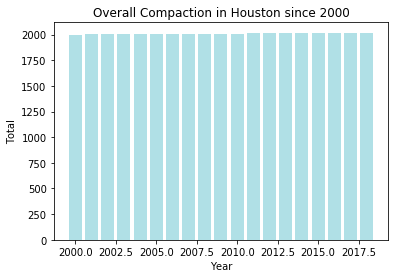

In [4]:
#Plotting and labels!
year=soil_data["Year"].round()
plt.bar(soil_data["Year"],year, color="powderblue", align="center")
plt.title("Overall Compaction in Houston since 2000")
plt.xlabel("Year")
plt.ylabel("Total")
plt.show()

In [5]:
#Original flipped:
filetwo=("Compaction_year.csv") 
soil_year=pd.read_csv(filetwo,encoding='utf-8')
soil_year.head()

,County,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Addicks,3.127917,3.202769,3.295077,3.374923,3.400154,3.430462,3.496538,3.478000,3.483083,3.530167,3.536385,3.581154,3.619917,3.630833,3.652091,3.656250,3.682333,3.710833,3.734250
1,Texas City,0.094615,0.096846,0.094000,0.092154,0.094538,0.094385,0.096769,0.097538,0.096000,0.091167,0.094692,0.100846,0.099750,0.100500,0.101000,0.097333,0.097750,0.096000,0.094917
2,Southwest,1.529692,1.530385,1.528538,1.532154,1.506692,1.526615,1.562692,1.540615,1.544583,1.626333,1.611615,1.627308,1.646333,1.637583,1.637909,1.579152,1.674667,1.683583,1.689083
3,Seabrook,1.532769,1.511154,1.509462,1.500692,1.491846,1.486923,1.499769,1.481462,1.489333,1.498000,1.497077,1.543692,1.577583,1.580917,1.579273,1.562333,1.522223,1.582500,1.570500
4,Pasadena,0.302462,0.329000,0.314923,0.296462,0.267615,0.233923,0.244538,0.234615,0.236750,0.251167,0.285769,0.443846,0.513750,0.616833,0.642636,0.542750,0.493000,0.473417,0.464750


In [6]:
#USGS total sum compacition data:
comp_one=("Totalsum_compbyyear.csv")
compsum=pd.read_csv(comp_one,encoding='utf-8')
compsum.head()

,Year,Total Compaction (ft)
0,2000,-14.513301
1,2001,-14.643462
2,2002,-14.670231
3,2003,-14.685846
4,2004,-14.586231


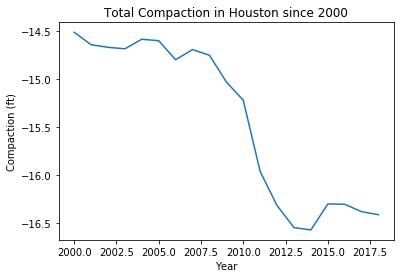

In [12]:
#Plotting and labels:
#plt.plot(compsum["Year"],compsum["Total Compaction (ft)"], color="powderblue", align="center")
x_axis=compsum["Year"].astype(int)
y_axis=compsum["Total Compaction (ft)"]
plt.plot(x_axis, y_axis)
plt.title("Total Compaction in Houston since 2000")
plt.xlabel("Year")
plt.ylabel("Compaction (ft)")
plt.show()

In [13]:
#USGS total compacition ave. data:
comp_two=("Toalave_compbyyear.csv")
compave=pd.read_csv(comp_two,encoding='utf-8')
compave.head()

,Year,Total Ave
0,2000,-1.294777
1,2001,-1.304949
2,2002,-1.313009
3,2003,-1.319282
4,2004,-1.311744


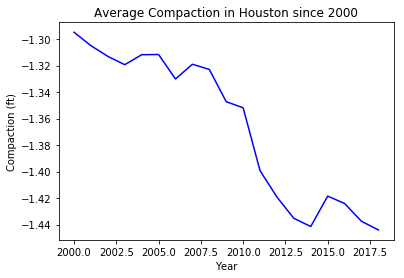

In [14]:
#Plotting and labels!
x_axis = compave["Year"].astype(int)
y_axis= compave["Total Ave"]
plt.plot (x_axis,y_axis, color="blue")
plt.title("Average Compaction in Houston since 2000")
plt.xlabel("Year")
plt.ylabel("Compaction (ft)")
plt.show()

In [15]:
#Avreage compaction by area/region: 
addicks=soil_data["Addicks"].mean()
texas_city=soil_data["Texas City"].mean()
southwest=soil_data["Southwest"].mean()
seabrook=soil_data["Seabrook"].mean()
pasadena=soil_data["Pasadena"].mean()
northeast=soil_data["Northeast"].mean()
lakehouston=soil_data['Lake Houston'].mean()
spacecity=soil_data['Johnson Space City'].mean()
eado=soil_data['East End'].mean()
Countymeans=[addicks, texas_city,southwest, seabrook, pasadena, northeast, lakehouston, spacecity, eado]
Counties=["Addicks", "Texas City", 'Southwest', 'Seabrook', 'Pasadena', 'Northeast', 'Lake Houston', 'Johnson Space City','EADO']
Zipcode=[77494,77590,77044,77586,77502,77073,77532,77058,77002]
Lat=[29.740677,29.391397,29.906616, 29.583816, 29.679518, 29.999166,29.932872, 29.561579,29.756845]
Lng=[ -95.829652,-94.920149,-95.180608,-95.036166,-95.199783, -95.400119,-95.057187,-95.099626, -95.365652 ]
Soil_means=pd.DataFrame({"County":Counties, "Zipcodes":Zipcode,"Lat":Lat, "Lng":Lng,"Avreage Compaction(ft)":Countymeans})
Soil_means

,County,Zipcodes,Lat,Lng,Avreage Compaction(ft)
0,Addicks,77494,29.740677,-95.829652,3.506481
1,Texas City,77590,29.391397,-94.920149,0.096358
2,Southwest,77044,29.906616,-95.180608,1.590291
3,Seabrook,77586,29.583816,-95.036166,1.527237
4,Pasadena,77502,29.679518,-95.199783,0.378327
5,Northeast,77073,29.999166,-95.400119,0.878826
6,Lake Houston,77532,29.932872,-95.057187,0.581543
7,Johnson Space City,77058,29.561579,-95.099626,2.406221
8,EADO,77002,29.756845,-95.365652,1.324833


In [16]:
# REFERENCE LINK FOR COLUMN DEFINITION
# https://www.fema.gov/openfema-dataset-individual-assistance-housing-registrants-large-disasters-v1


print("FEMA DataSet : Individual Assistance Housing Registrants Large Disasters")
# FEMA Data | KINGWOOD Repair Amount > 25000 | 422 rows
url_houston = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27HOUSTON%27%20and%20repairAmount%20gt%2025000"
url_humble = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27HUMBLE%27%20and%20repairAmount%20gt%2025000"
url_katy = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27KATY%27%20and%20repairAmount%20gt%2025000"
url_kingwood = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27KINGWOOD%27%20and%20repairAmount%20gt%2025000"
url_pearland = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27PEARLAND%27%20and%20repairAmount%20gt%2025000"
url_spring = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27SPRING%27%20and%20repairAmount%20gt%2025000"

#url_spring1 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777373%27%20and%20repairAmount%20gt%2025000"
#url_spring2 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777389%27%20and%20repairAmount%20gt%2025000"
#url_spring3 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777388%27%20and%20repairAmount%20gt%2025000"
#url_spring4 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777379%27%20and%20repairAmount%20gt%2025000"
#url_spring5 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777386%27%20and%20repairAmount%20gt%2025000"

url_sugarland1 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777478%27%20and%20repairAmount%20gt%2025000"
url_sugarland2 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777479%27%20and%20repairAmount%20gt%2025000"
url_sugarland3 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777487%27%20and%20repairAmount%20gt%2025000"
url_sugarland4 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777496%27%20and%20repairAmount%20gt%2025000"
url_sugarland5 = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedZipCode%20eq%20%2777498%27%20and%20repairAmount%20gt%2025000"

url_woodlands = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27THE%20WOODLANDS%27%20and%20repairAmount%20gt%2025000"
url_friendswoods = "https://www.fema.gov/api/open/v1/IndividualAssistanceHousingRegistrantsLargeDisasters?$filter=damagedStateAbbreviation%20eq%20%27TX%27%20and%20damagedCity%20eq%20%27FRIENDSWOOD%27%20and%20repairAmount%20gt%2025000"

print(" ")
print("Calling APIs...")

houston = requests.get(url_houston).json()
humble = requests.get(url_humble).json()
katy = requests.get(url_katy).json()
kingwood = requests.get(url_kingwood).json()
pearland = requests.get(url_pearland).json()
spring = requests.get(url_spring).json()

sugarland1 = requests.get(url_sugarland1).json()
sugarland2 = requests.get(url_sugarland2).json()
sugarland3 = requests.get(url_sugarland3).json()
sugarland4 = requests.get(url_sugarland2).json()
sugarland5 = requests.get(url_sugarland3).json()

woodlands = requests.get(url_woodlands).json()
friendswood = requests.get(url_friendswoods).json()

print(" ")
print("Creating DataFrames & Populating DataFrames")

df_houston = pd.DataFrame(houston["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_humble = pd.DataFrame(humble["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_katy = pd.DataFrame(katy["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_kingwood = pd.DataFrame(kingwood["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_pearland = pd.DataFrame(pearland["IndividualAssistanceHousingRegistrantsLargeDisasters"])

df_sugarland1 = pd.DataFrame(sugarland1["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland2 = pd.DataFrame(sugarland2["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland3 = pd.DataFrame(sugarland3["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland4 = pd.DataFrame(sugarland2["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland5 = pd.DataFrame(sugarland3["IndividualAssistanceHousingRegistrantsLargeDisasters"])
#df_sugarland = pd.DataFrame(sugarland["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_woodlands = pd.DataFrame(woodlands["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_friendswood = pd.DataFrame(friendswood["IndividualAssistanceHousingRegistrantsLargeDisasters"])

# Consolidate FEMA CITY NAME that won't pull by damageCity
df_spring = pd.DataFrame(spring["IndividualAssistanceHousingRegistrantsLargeDisasters"])
df_sugarland = pd.concat([df_sugarland1, df_sugarland2, df_sugarland3, df_sugarland4, df_sugarland5])

print(" ")
print("FEMA DataSet : Individual Assistance Housing Registrants Large Disasters | Repair Amount > 25000")
print("Repair Amount > 25000 for the cities of: Houston, Humble, Katy, Pearland, Spring, Sugarland, The Woodlands & Friendswood.")
print("Data Ready...")

FEMA DataSet : Individual Assistance Housing Registrants Large Disasters
 
Calling APIs...
 
Creating DataFrames & Populating DataFrames
 
FEMA DataSet : Individual Assistance Housing Registrants Large Disasters | Repair Amount > 25000
Repair Amount > 25000 for the cities of: Houston, Humble, Katy, Pearland, Spring, Sugarland, The Woodlands & Friendswood.
Data Ready...


In [23]:
#df_data = pd.DataFrame(columns=['Houston', 'Humble', 'Katy', 'Kingwood', 'Pearland', 'Sugarland', 'Woodlands', 'Friendswood'])
#df_repairAmount = pd.DataFrame(columns=['Area','Claim Count > $25000.00', 'FEMA | Real Property Damage > $25000.00'])
df_repairAmount = pd.DataFrame(columns=['Area','Claim Count > $25000.00', 'Repair Amount > $25000.00'])

# repairAmount :
df_repairAmount["Area"] = ['Houston', 'Humble', 'Katy', 'Kingwood', 'Pearland','Spring', 'Sugarland', 'The Woodlands','Friendswood']
df_repairAmount["Claim Count > $25000.00"] = [df_houston['repairAmount'].count(), df_humble['repairAmount'].count(), df_katy['repairAmount'].count(), df_kingwood['repairAmount'].count(), df_pearland['repairAmount'].count(), df_spring['repairAmount'].count(), df_sugarland['repairAmount'].count(),  df_woodlands['repairAmount'].count(), df_friendswood['repairAmount'].count()]
df_repairAmount["Repair Amount > $25000.00"] = [df_houston['repairAmount'].sum(), df_humble['repairAmount'].sum(), df_katy['repairAmount'].sum(), df_kingwood['repairAmount'].sum(), df_pearland['repairAmount'].sum(), df_spring['repairAmount'].sum(), df_sugarland['repairAmount'].sum(), df_woodlands['repairAmount'].sum(), df_friendswood['repairAmount'].sum()]

df_repairAmount

,Area,Claim Count > $25000.00,Repair Amount > $25000.00
0,Houston,1000,27837777.20
1,Humble,208,6147811.57
2,Katy,261,7409494.68
3,Kingwood,422,12596717.61
4,Pearland,32,911365.64
5,Spring,219,6440844.72
6,Sugarland,42,1168464.38
7,The Woodlands,3,90690.39
8,Friendswood,127,3660969.63


In [1]:
# Create a poverty Heatmap layer
locations2=Soil_means[['Lat','Lng']].astype('float')

#locations=(77494,77590,77044,77586,77502,77073,77532,77058,77002)
c=Soil_means['Avreage Compaction(ft)'].astype('float')
compaction=c



compaction_layer = gmaps.heatmap_layer(locations2, weights=compaction, 
                                 dissipating=False, max_intensity=-100,
                                 point_radius = .11, gradient=[(90, 150, 210,0.1),
                                                              (0,0,255,0.8),
                                                              (0,0,0,1)])

NameError: name 'Soil_means' is not defined

In [77]:


site_wells = [
    {'name': 'Addicks', 'location': (29.740677,-95.829652), 'compaction_ratio': 3.506481},
    {'name': 'Texas City', 'location': (29.391397,-94.920149), 'compaction_ratio': 0.096358},
    {'name': 'North East', 'location': (29.906616,-95.180608), 'compaction_ratio': 1.590291},
    {'name': 'Seabrook', 'location': (29.583816,-95.036166), 'compaction_ratio': 1.527237},
    {'name': 'Pasadena', 'location': (29.679518,-95.199783), 'compaction_ratio': 0.378327},
    {'name': 'North Central', 'location': (29.999166,-95.400119), 'compaction_ratio': 0.878826},
    {'name': 'Lake Houston', 'location': (29.932872,-95.057187), 'compaction_ratio': 00.581543},
    {'name': 'Johnson Space City', 'location': (29.561579,-95.099626), 'compaction_ratio': 2.406221},
    {'name': 'EADO', 'location': (29.756845,-95.365652), 'compaction_ratio': 1.324833},
]
locations2=Soil_means[['Lat','Lng']].astype('float')
site_locations = [site['location'] for site in site_wells]
info_box_template = """
<dl>
<dt>Name</dt><dd>{name}</dd>
<dt>Average Compaction ( ft )</dt><dd>{compaction_ratio}</dd>
</dl>
"""
site_info = [info_box_template.format(**site) for site in site_wells]




In [60]:
# Import Zipcodes
df_zipcodes = pd.DataFrame(columns=['Zipcode','Lattitude','Longitude'])
df_zipcodes = pd.read_csv('zipcodes.csv')

In [78]:
# https://jupyter-gmaps.readthedocs.io/en/latest/api.html

# Create aiport dataframe
compiledDamagedZipCodes_df = pd.DataFrame(columns=['damagedZipCode','count', 'lattitude','longitude'])
compiledDamagedZipCodes_df = pd.read_csv('compiledDamagedZipCodes.csv')


# Store latitude and longitude in locations
locations = compiledDamagedZipCodes_df[["lattitude", "longitude"]]

# Fill NaN values and convert to float
rating = compiledDamagedZipCodes_df["count"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=rating/1, dissipating=False, max_intensity=250, point_radius = 250)



markers = gmaps.marker_layer(locations2)
marker_layer2 = gmaps.marker_layer(site_locations, info_box_content=site_info)
# Add the layer to the map

fig.add_layer(heat_layer)
fig.add_layer(compaction_layer)
fig.add_layer(markers)
fig.add_layer(marker_layer2)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))